# **ANALYSE DES VENTES DE LA LIBRAIRIE LAPAGE AVEC PYTHON**

### **MISSION** : Analyser les points forts/faibles, le comportement des clients,etc.

**1ère partie** : **Analyse des différents indicateurs de vente**
1.   Analyse des différents indicateurs et graphiques autour du
chiffre d'affaires
2.   Analyse de l’évolution dans le temps et mettre en place une
décomposition en moyenne mobile pour évaluer la tendance globale
3.   Faire un zoom sur les références, pour voir un peu les tops et les
flops, la répartition par catégorie, etc
4.   Fournir des informations sur les profils de nos clients, et également la répartition du chiffre d'affaires entre eux, via une courbe de Lorenz
5.   D'autres informations et graphiques qui apporteraient de l’information pertinente


**2ème partie : Analyse ciblée clients**   

L’objectif est de comprendre le comportement des clients en ligne, pour pouvoir ensuite comparer avec la connaissance acquise via les librairies physiques. 
Analyse:
1.   du lien entre le genre d’un client et les catégories des livres achetés ;
2.   du lien entre l’âge des clients et le montant total des achats, la fréquence d’achat, la taille du panier moyen et les catégories des livres achetés


# Sommaire :
**Partie 1 : Importation des données**
 - <a href="#C1">Importation des librairies</a>
 - <a href="#C2">Importation des jeux de données</a>
 
**Partie 2 : Analyse des jeux de données**
 - <a href="#C3">Affichage du nombre de lignes et colonnes des jeux de données </a>
 - <a href="#C4">Analyse des valeurs manquantes</a>
 - <a href="#C5">Analyse des types de données</a>
 
**Partie 3 : Nettoyage du jeu de données**
 - <a href="#C6">Traitement des valeurs test</a>
 - <a href="#C7">Conversion de types</a>
 - <a href="#C8">Unicité de la clé primaire</a>
 - <a href="#C9">Détection des doublons</a>
 - <a href="#C10">Traitement des valeurs négatives</a> 
  
**Partie 4 : Jointure des dataframes**
 - <a href="#C11">Jointure des 3 tables</a>
 
**Partie 5 : Demandes d'Antoine : Série d’indicateurs statistiques de tendances centrales et dispersions**
 - <a href="#C12">Distribution des prix</a>
 
**Partie 6 : Demandes de Julie**
 - <a href="#C13">Corrélations</a>

# **<font color='indianred'>Partie 1 : Importation des données</font></a>**

## <a name="C1"><font color='LightSeaGreen'>Import des librairies </font></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime,date,timedelta 
import datetime as dt
import scipy.stats as st
import io 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
from google.colab import files

## <a name="C2"><font color='LightSeaGreen'>Import des jeux de données </font></a>

In [4]:
uploaded = files.upload()

Saving customers.csv to customers.csv
Saving products.csv to products.csv
Saving transactions.csv to transactions.csv


In [5]:
df_customers = pd.read_csv(io.BytesIO(uploaded['customers.csv'])) 
df_customers


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943
...,...,...,...
8618,c_7920,m,1956
8619,c_7403,f,1970
8620,c_5119,m,1974
8621,c_5643,f,1968


In [6]:
df_products = pd.read_csv(io.BytesIO(uploaded['products.csv'])) 
df_products


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0
...,...,...,...
3282,2_23,115.99,2
3283,0_146,17.14,0
3284,0_802,11.22,0
3285,1_140,38.56,1


In [7]:
df_transactions = pd.read_csv(io.BytesIO(uploaded['transactions.csv'])) 
df_transactions

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


# **<font color='indianred'>Partie 2 : Analyse des jeux de données</font></a>**

## <a name="C3"><font color='LightSeaGreen'>Affichage du nombre de lignes et colonnes des jeux de données</font></a>

In [8]:
df_customers.info()
print('\n')
df_products.info()
print('\n')
df_transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   sessi

In [9]:
#nombre de lignes et colonnes
print('Table customers',df_customers.shape)
print('Table products',df_products.shape)
print('Table transactions',df_transactions.shape)

Table customers (8623, 3)
Table products (3287, 3)
Table transactions (679532, 4)


## <a name="C4"><font color='LightSeaGreen'>Analyse des valeurs manquantes</font></a>

In [10]:
#Création d'une fonction calculant le pourcentage de valeurs manquantes 
#et affichant une heatmap pour visualiser les valeurs manquantes 
def val_manq(df):
    ligne,colonne=df.shape
    nb_cell=ligne*colonne
    nb_null=df.isnull().sum().sum()
    prct=nb_null *100/nb_cell
    print('Nombre de valeurs manquantes =',nb_null)
    print('Nombre de cellulles totales =',nb_cell)
    print('Pourcentage de valeurs manquantes = ',round(prct,2),'%') 
    print('\n')
    print('Pourcentage de valeurs manquantes avec le nombre de colonnes =\n',round((df.isna().sum()*100/df.shape[0]),2).value_counts(ascending=True))
    #Calcul des pourcentages de valeurs manquantes par variable(colonne)
    print('\n')
    print('Pourcentage de valeurs manquantes par variable/colonne =\n', 
          round((df.isna().sum()*100/df.shape[0]),2).sort_values(ascending=True))
    print('\n')
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isna(), cbar=False)

1-Table customers :
Nombre de valeurs manquantes = 0
Nombre de cellulles totales = 25869
Pourcentage de valeurs manquantes =  0.0 %


Pourcentage de valeurs manquantes avec le nombre de colonnes =
 0.0    3
dtype: int64


Pourcentage de valeurs manquantes par variable/colonne =
 client_id    0.0
sex          0.0
birth        0.0
dtype: float64


---------------------------------------
2-Table products :
Nombre de valeurs manquantes = 0
Nombre de cellulles totales = 9861
Pourcentage de valeurs manquantes =  0.0 %


Pourcentage de valeurs manquantes avec le nombre de colonnes =
 0.0    3
dtype: int64


Pourcentage de valeurs manquantes par variable/colonne =
 id_prod    0.0
price      0.0
categ      0.0
dtype: float64


---------------------------------------
3-Table transactions :
Nombre de valeurs manquantes = 0
Nombre de cellulles totales = 2718128
Pourcentage de valeurs manquantes =  0.0 %


Pourcentage de valeurs manquantes avec le nombre de colonnes =
 0.0    4
dtype: int64


Pourc

Text(0.5, 1.0, 'Heatmap des valeurs manquantes transactions')

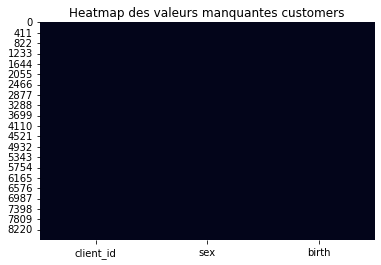

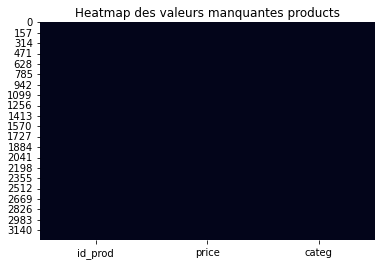

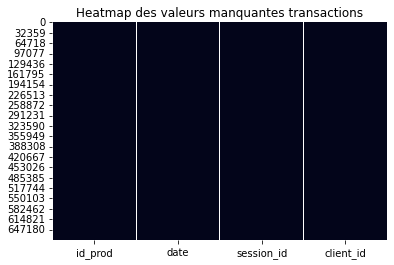

In [11]:
#Appel de la fonction val_manq 
#Affichage des pourcentages de valeurs manquantes des 3 jeux de données 
print('1-Table customers :')
val_manq(df_customers)
plt.title("Heatmap des valeurs manquantes customers")
print('---------------------------------------')
print('2-Table products :')
val_manq(df_products)
plt.title("Heatmap des valeurs manquantes products")
print('---------------------------------------')
print('3-Table transactions :')
val_manq(df_transactions)
plt.title("Heatmap des valeurs manquantes transactions")

✅ Analyse des valeurs manquantes : Il n'y a pas de valeurs manquantes dans les tables

## <a name="C5"><font color='LightSeaGreen'>Analyse des types de données</font></a>

In [12]:
#type des variables de la table customers
print(df_customers.dtypes)
print('\n')
#compte le nombre de variables par type
df_customers.dtypes.value_counts()

client_id    object
sex          object
birth         int64
dtype: object




object    2
int64     1
dtype: int64

Table customers : Les types des variables sont conformes aux valeurs.

In [13]:
#type des variables de la table products
print(df_products.dtypes)
print('\n')
#compte le nombre de variables par type
df_products.dtypes.value_counts()

id_prod     object
price      float64
categ        int64
dtype: object




object     1
float64    1
int64      1
dtype: int64

Table products : Les types des variables sont conformes aux valeurs.

In [14]:
#type des variables de la table transactions
print(df_transactions.dtypes)
print('\n')
#compte le nombre de variables par type
df_transactions.dtypes.value_counts()

id_prod       object
date          object
session_id    object
client_id     object
dtype: object




object    4
dtype: int64

Table transactions : Toutes les variables sont des chaines de caractères exceptée la variable date qui doit être convertie au format date.

# **<font color='indianred'>Partie 3 : Nettoyage du jeu de données</font>**

## <a name="C6"><font color='LightSeaGreen'>Traitement des valeurs test</font></a>

Il y a des valeurs "test" sous forme de chaines de caractères qu'il faut traiter.

✅ Traitement des lignes "test"

In [15]:
#trouver les lignes contenant la chaine de caractères "test" dans la colonne date
df_trans_test=df_transactions.query("date.str.contains('test')", engine="python")
df_trans_test           

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


In [16]:
#copie du df transactions
dft=df_transactions.copy()
dft

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [17]:
#suppression des lignes contenant la chaine 'test_' dans dft
dft=dft.drop(dft.query("date.str.contains('test_')",engine="python").index)
dft

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232
...,...,...,...,...
679527,0_1551,2022-01-15 13:05:06.246925,s_150195,c_8489
679528,1_639,2022-03-19 16:03:23.429229,s_181434,c_4370
679529,0_1425,2022-12-20 04:33:37.584749,s_314704,c_304
679530,0_1994,2021-07-16 20:36:35.350579,s_63204,c_2227


In [18]:
#demande si les lignes 'test_' est toujours présente dans la colonne 'date' 
dft.query("date.str.contains('test_')",engine="python")['date']

Series([], Name: date, dtype: object)

La liste est vide car le dataframe transactions ne contient plus de lignes 'test_' dans la colonne date. On peut procéder à la conversion des dates en format date.

## <a name="C7"><font color='LightSeaGreen'>Conversion de types</font></a>

In [19]:
#conversion en format datetime de la colonne date
dft['date']=pd.to_datetime(dft['date'])

In [20]:
#Affiche le type de date en tant que datetime64[ns]
dft.dtypes

id_prod               object
date          datetime64[ns]
session_id            object
client_id             object
dtype: object

## <a name="C8"><font color='LightSeaGreen'>Unicité de la clé primaire</font></a>

In [21]:
#Creation d'une fonction qui teste l'unicité d'une colonne
def cle_primaire(df,col):
    if len(df)==len(df[col].unique()):
        print('La variable', col, 'est une clé primaire')
    else: 
        print('La variable', col, 'n\'est pas une clé primaire')

In [22]:
cle_primaire(df_customers,'client_id')
cle_primaire(df_products,'id_prod')
cle_primaire(dft,'session_id')

La variable client_id est une clé primaire
La variable id_prod est une clé primaire
La variable session_id n'est pas une clé primaire


## <a name="C9"><font color='LightSeaGreen'>Détection des doublons</font></a>

In [23]:
#Fonction qui detecte les doublons
def detect_doublons(df):
    doub=df[df[df.columns].duplicated(subset=None, keep='first')]
    print('------------------') 
    print('La table contient', len(doub), 'doublons.')
    print(doub.shape)
    print('\n') 
    print(doub)
    print('\n')

In [24]:
print('------------------') 
print('Table customers')
detect_doublons(df_customers)
print('------------------') 
print('Table products')
detect_doublons(df_products)
print('------------------') 
print('Table transactions')
detect_doublons(dft)

------------------
Table customers
------------------
La table contient 0 doublons.
(0, 3)


Empty DataFrame
Columns: [client_id, sex, birth]
Index: []


------------------
Table products
------------------
La table contient 0 doublons.
(0, 3)


Empty DataFrame
Columns: [id_prod, price, categ]
Index: []


------------------
Table transactions
------------------
La table contient 0 doublons.
(0, 4)


Empty DataFrame
Columns: [id_prod, date, session_id, client_id]
Index: []




Il n'y a pas de doublons.

## <a name="C10"><font color='LightSeaGreen'>Traitement des valeurs négatives</font></a>

In [25]:
#récupère la ligne où le prix est négatif 
df_prod_negatif=df_products[df_products['price']<0].index
df_prod_negatif

Int64Index([731], dtype='int64')

In [26]:
#supprime la ligne où le prix est négatif dans df_products
df_products=df_products.drop(df_prod_negatif)

In [27]:
df_products[df_products['price']<0]

,id_prod,price,categ


# **<font color='indianred'>Partie 4 : Jointure des dataframes</font></a>**

## <a name="C11"><font color='LightSeaGreen'>Jointure des 3 tables</font></a>

#### <font color='purple'>1ere jointure entre products and transactions</font>

In [28]:
#Jointure complète entre df_products et df_transactions
df_protrans=pd.merge(df_products, dft, left_on='id_prod', right_on='id_prod', how='outer', indicator=True)
df_protrans

,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both
...,...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


#### <font color='purple'>Produit 0_2245 non référencé dans le df_products : Imputation pour la catégorie et le prix</font>

In [29]:
#affiche les produits existants dans le df transactions (vendus) mais pas dans le df_products (non-référencé)
df_protrans[df_protrans['_merge']=='right_only']

,id_prod,price,categ,date,session_id,client_id,_merge
679132,0_2245,NaN,NaN,2022-09-23 07:22:38.636773,s_272266,c_4746,right_only
679133,0_2245,NaN,NaN,2022-07-23 09:24:14.133889,s_242482,c_6713,right_only
679134,0_2245,NaN,NaN,2022-12-03 03:26:35.696673,s_306338,c_5108,right_only
679135,0_2245,NaN,NaN,2021-08-16 11:33:25.481411,s_76493,c_1391,right_only
679136,0_2245,NaN,NaN,2022-07-16 05:53:01.627491,s_239078,c_7954,right_only
...,...,...,...,...,...,...,...
679348,0_2245,NaN,NaN,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,NaN,NaN,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,NaN,NaN,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,NaN,NaN,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


Le produit de référence 0_2245 a été vendu 221 fois sans qu'il ne soit référencé dans la table products. Ce produit fait partie de la catégorie 0 car le premier chiffre des codes produits font référence à sa categorie.
Je vais donc remplacer les nan de la colonne catégorie par 0 pour le produit 0_2245.
Pour la colonne price, je vais imputer par la moyenne / la médiane. Je vais d'abord analyser la distribution de la variable price (symetrique/asymétrique) pour choisir entre la moyenne et la mediane. Si elles sont differentes (distribution non gaussienne), alors j'utiliserai la mediane. 

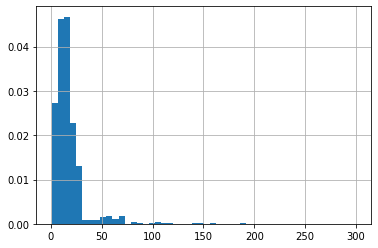

In [30]:
#Création de la courbe sur la variable price
df_protrans['price'].hist(density=True, bins=50)

Il y a une asymétrie dans la distribution sur price, j'utilise donc l'imputation par la médiane.

In [31]:
 #Calcul de la médiane sur la variable price pour les produits de la catégorie 0 qui est la catégorie du produit 0_2245
median0=df_protrans[(df_protrans['categ']==0)]['price'].median()
print('La médiane sur la variable price pour les produits de la catégorie 0 est égale à :', median0)

La médiane sur la variable price pour les produits de la catégorie 0 est égale à : 9.99


In [32]:
#Je remplace les valeurs nulles du prix du produit 0_2245 par la médiane 
df_protrans['price'].fillna(value=median0, inplace=True)
#Je remplace les valeurs nulles de categ par 0 pour le produit 0_2245
df_protrans['categ'].fillna(0, inplace=True)
df_protrans

,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both
...,...,...,...,...,...,...,...
679348,0_2245,9.99,0.0,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,9.99,0.0,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,9.99,0.0,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,9.99,0.0,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


#### <font color='purple'>Produits non vendus</font>

In [33]:
#affiche les produits non vendus
df_prod_nonvendus=df_protrans[df_protrans['_merge']=='left_only']

21 produits n'ont pas ete vendus.

In [34]:
#suppression des 21 produits non vendus car ils ne sont pas nombreux
df_protrans=df_protrans.drop(df_protrans[df_protrans['_merge']=='left_only'].index)
df_protrans

,id_prod,price,categ,date,session_id,client_id,_merge
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both
...,...,...,...,...,...,...,...
679348,0_2245,9.99,0.0,2021-08-25 09:06:03.504061,s_80395,c_131,right_only
679349,0_2245,9.99,0.0,2022-03-06 19:59:19.462288,s_175311,c_4167,right_only
679350,0_2245,9.99,0.0,2022-05-16 11:35:20.319501,s_209381,c_4453,right_only
679351,0_2245,9.99,0.0,2022-02-11 09:05:43.952857,s_163405,c_1098,right_only


In [35]:
#Il était aussi possible de faire la jointure à gauche mais le produit 0_2245 et les produits non vendus 
#n'auraient pas été mis en avant et nous n'aurions pas pu faire l'imputation
dff=pd.merge(df_products, dft, on='id_prod', how='left')
dff.isnull().sum()
print(dff[dff['price'].isnull()])
dff[dff['id_prod']=='0_2245']

Empty DataFrame
Columns: [id_prod, price, categ, date, session_id, client_id]
Index: []


,id_prod,price,categ,date,session_id,client_id


In [36]:
dff.shape

(679132, 6)

#### <font color='purple'>2eme jointure avec customers</font>

In [37]:
#jointure avec la table customers sur client_id
df_transcl=pd.merge(df_protrans, df_customers, left_on='client_id', right_on='client_id', how='outer')
df_transcl

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both,f,1991
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,both,f,1991
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,both,f,1991
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,both,f,1991
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,both,f,1991
...,...,...,...,...,...,...,...,...,...
679350,NaN,NaN,NaN,NaT,NaN,c_7584,NaN,f,1960
679351,NaN,NaN,NaN,NaT,NaN,c_90,NaN,m,2001
679352,NaN,NaN,NaN,NaT,NaN,c_587,NaN,m,1993
679353,NaN,NaN,NaN,NaT,NaN,ct_1,NaN,m,2001


#### <font color='purple'>Clients qui n'ont pas fait d'achats</font>

In [38]:
#df des clients qui n'ont pas fait d'achats
df_clients_passifs=df_transcl[(df_transcl['id_prod'].isnull())&(df_transcl['session_id'].isnull())]
df_clients_passifs

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth
679332,NaN,NaN,NaN,NaT,NaN,c_8253,NaN,f,2001
679333,NaN,NaN,NaN,NaT,NaN,c_3789,NaN,f,1997
679334,NaN,NaN,NaN,NaT,NaN,c_4406,NaN,f,1998
679335,NaN,NaN,NaN,NaT,NaN,ct_0,NaN,f,2001
679336,NaN,NaN,NaN,NaT,NaN,c_2706,NaN,f,1967
679337,NaN,NaN,NaN,NaT,NaN,c_3443,NaN,m,1959
679338,NaN,NaN,NaN,NaT,NaN,c_4447,NaN,m,1956
679339,NaN,NaN,NaN,NaT,NaN,c_3017,NaN,f,1992
679340,NaN,NaN,NaN,NaT,NaN,c_4086,NaN,f,1992
679341,NaN,NaN,NaN,NaT,NaN,c_6930,NaN,m,2004


Le df_clients_passifs contient les 23 clients qui n'ont pas fait d'achats.

In [39]:
#Je supprime les 23 clients qui n'ont pas fait d'achats du df transcl. car ils ne sont pas nombreux
df_transcl=df_transcl.drop((df_transcl[(df_transcl['id_prod'].isnull())&
                                       (df_transcl['session_id'].isnull())]).index)
df_transcl

,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both,f,1991
1,0_1421,19.99,0.0,2022-10-20 17:04:37.204937,s_285450,c_6389,both,f,1991
2,0_2131,8.99,0.0,2021-10-09 21:47:06.777914,s_102458,c_6389,both,f,1991
3,0_1635,16.99,0.0,2021-04-28 06:08:38.261863,s_26841,c_6389,both,f,1991
4,0_166,1.83,0.0,2021-07-15 10:35:31.526968,s_62585,c_6389,both,f,1991
...,...,...,...,...,...,...,...,...,...
679327,2_163,68.99,2.0,2022-01-28 16:51:07.389515,s_156517,c_7739,both,m,1997
679328,2_101,63.99,2.0,2021-07-21 09:11:12.619736,s_65192,c_7089,both,m,2002
679329,2_101,63.99,2.0,2022-12-21 09:11:12.619736,s_315267,c_7089,both,m,2002
679330,2_101,63.99,2.0,2022-10-21 09:11:12.619736,s_285788,c_7089,both,m,2002


In [40]:
#Nombre de valeurs nulles dans la table protrans
df_transcl.isnull().sum()

id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
_merge        0
sex           0
birth         0
dtype: int64

In [41]:
#la jointure a changé le type de "birth" et "categ" en float
#j'ai converti en integer
df_transcl['birth']=df_transcl['birth'].values.astype(np.int64)
df_transcl['categ']=df_transcl['categ'].values.astype(np.int64)
df_transcl.pop('_merge')
df_transcl.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991


In [42]:
#La jointure à gauche nous évite d'avoir à supprimer les clients qui n'ont pas fait d'achats
#car la jointure ne se serait pas faite sur des lignes où il n'y a pas de référence produits
dfff=pd.merge(df_protrans, df_customers, on='client_id', how='left')
dfff.isnull().sum()
(dfff[dfff['date'].isnull()])
dfff.head()


,id_prod,price,categ,date,session_id,client_id,_merge,sex,birth
0,0_1421,19.99,0.0,2022-02-20 17:04:37.204937,s_168213,c_6389,both,f,1991
1,0_1421,19.99,0.0,2022-11-19 03:42:20.707442,s_299590,c_8364,both,m,1973
2,0_1421,19.99,0.0,2021-09-19 14:58:46.726179,s_92304,c_3544,both,f,1967
3,0_1421,19.99,0.0,2023-01-11 16:04:24.367855,s_325369,c_1025,both,m,1984
4,0_1421,19.99,0.0,2021-08-01 19:33:18.877168,s_70071,c_2298,both,m,1972


In [43]:
dfff.isnull().sum()


id_prod       0
price         0
categ         0
date          0
session_id    0
client_id     0
_merge        0
sex           0
birth         0
dtype: int64

In [44]:
df_transcl.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991


# **<font color='indianred'>Partie 5 : Demandes d'Antoine : Série d’indicateurs statistiques de tendances centrales et dispersions</font></a>**

#### <font color='purple'>Ajout de colonnes only_date, time, year, month, day et age</font>

In [45]:
#Extraction de la date, de l'heure(+minutes+secondes), de l'année, du mois et du jour
#df_transcl['only_date']=df_transcl['date'].dt.date
df_transcl['time']=df_transcl['date'].dt.time
df_transcl['year']=df_transcl['date'].dt.year
df_transcl['month']=df_transcl['date'].dt.month
df_transcl['day']=df_transcl['date'].dt.day
#Concaténation de l'année et du mois
#df_transcl['dateym']=df_transcl.year.astype(str)+'-'+df_transcl.month.astype(str)
#Date courante
date = date.today()
#Calcul et ajout de la colonne age 
df_transcl['age']=date.year-df_transcl['birth'].astype(int)
df_transcl.head()

,id_prod,price,categ,date,session_id,client_id,sex,birth,time,year,month,day,age
0,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,17:04:37.204937,2022,2,20,31
1,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,17:04:37.204937,2022,10,20,31
2,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,21:47:06.777914,2021,10,9,31
3,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,06:08:38.261863,2021,4,28,31
4,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,10:35:31.526968,2021,7,15,31


In [46]:
df_transcl.dtypes

id_prod               object
price                float64
categ                  int64
date          datetime64[ns]
session_id            object
client_id             object
sex                   object
birth                  int64
time                  object
year                   int64
month                  int64
day                    int64
age                    int64
dtype: object

### <font color='LightSeaGreen'>Distribution des prix</font>

In [47]:
#Résumé statistique de la variable price
df_transcl[['price']].describe(include='all')

,price
count,679332.000000
mean,17.452345
std,18.326510
min,0.620000
25%,8.870000
50%,13.990000
75%,18.990000
max,300.000000


#### <font color='purple'>Distribution de la variable price</font>

In [48]:
#compte le nombre de valeurs uniques sur le prix
len((df_transcl['price']).value_counts().unique())

574

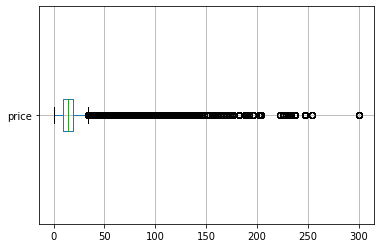

In [49]:
#Visualisation de la distribution de la variable price avec la boite à moustaches
df_transcl.boxplot(column='price', vert=False)

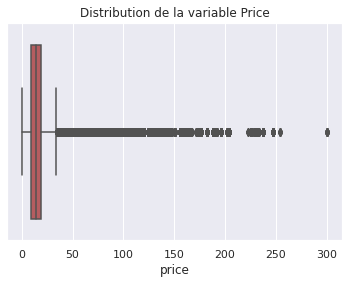

In [50]:
#utilisation de la librairie Seaborn pour representer la variable price sous forme de boxplot
sns.set(style="darkgrid")
sns.boxplot(x=df_transcl["price"], color="r")
plt.title('Distribution de la variable Price')

plt.savefig("distribution_price_boxplot.png")
plt.show()

In [51]:
#fonction qui filtre les outliers
def outlier_filtre(df,col):
 #trie les valeurs de la colonne
 sorted(col)
 #détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
 #1er quartile
 q1 = df[col].quantile(0.25)
 #3eme quartile
 q3 = df[col].quantile(0.75)
 #écart interquatile
 iqr = q3 - q1
 print('Ecart interquatile =', round(iqr,2))
 seuil_min = q1 -(1.5 * iqr) 
 seuil_max = q3 +(1.5 * iqr)
 print('Seuil min:',round(seuil_min,2))
 print('Seuil max:',round(seuil_max,2))
 #return df[(df[col] > seuil_min) & (df[col] < seuil_max)]

In [52]:
((outlier_filtre(df_transcl,'price')))

Ecart interquatile = 10.12
Seuil min: -6.31
Seuil max: 34.17


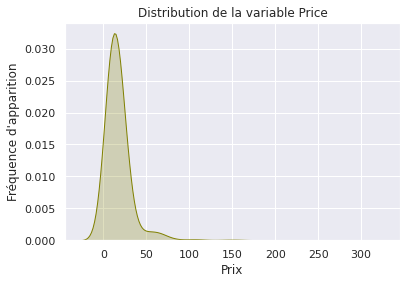

In [53]:
#distribution de la variable price sous forme de courbe
sns.set(style="darkgrid")
sns.kdeplot(df_transcl['price'], shade=True, bw_method=0.5, color="olive")
plt.title('Distribution de la variable Price')
plt.xlabel('Prix')
plt.ylabel('Fréquence d\'apparition')
plt.savefig("distribution_price.png")
plt.show()


Il y a des valeurs extremes mais possibles, ne représentant pas des valeurs aberrantes. Ce sont des produits extrêmement chers.

#### <font color='purple'>Mesure de concentration de la variable Price avec Lorenz </font>

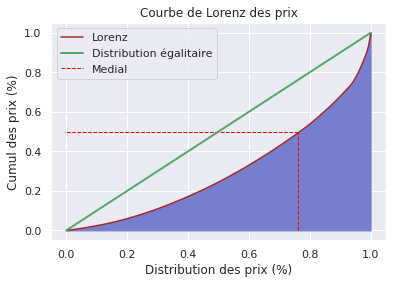

In [54]:
#Courbe de Lorenz sur la variable Price
#Sélection du sous-échantillon de travail que l'on appelle price
price = df_transcl['price'].values

#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_price = np.cumsum(np.sort(price)) / price.sum()

plt.plot(np.linspace(0,1,len(lorenz_price)), lorenz_price, drawstyle='steps-post', color='brown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_price)) ,lorenz_price , color='#777ecd')
plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz des prix')
plt.xlabel("Distribution des prix (%)")
plt.ylabel("Cumul des prix (%)")
plt.legend(loc="best")

plt.savefig("lorenz_price.png")
plt.show()

La courbe de Lorenz nous affiche une distance avec la premiere bissectrice donc il semblerait que la repartition de la variable Price n'est pas égalitaire. On voit aussi que 76% des ventes representent la moitié total du CA.

In [55]:
#Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
#Calcul de l'indice de Gini
aire=(lorenz_price.sum()-(lorenz_price[-1]/2)-(lorenz_price[0]/2))/(len(lorenz_price))
S=0.5-aire
gini=2*S
print('Coefficient de Gini=', round(gini,2))

Coefficient de Gini= 0.4


Le coefficient de Gini est plus proche de 0 que de 1 mais la répartition des prix n'est quand même pas égalitaire.

#### <font color='purple'>Répartition des prix par catégorie </font>

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


Text(0, 0.5, 'Prix (€)')

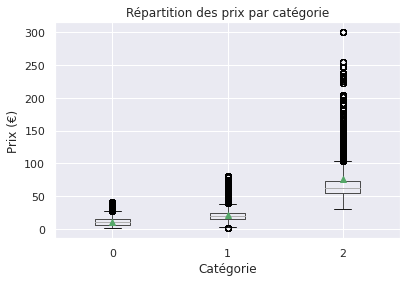

In [56]:
#Affiche avec matplotlib la répartition des prix par catégorie 
#showmeans affiche les valeurs moyennes en vert
df_transcl_boxplot=df_transcl.boxplot(column='price', by='categ', showmeans=True)
#supprime le titre donné par pandas
df_transcl_boxplot.get_figure().suptitle('')
plt.title('Répartition des prix par catégorie')
plt.xlabel("Catégorie")
plt.ylabel("Prix (€)")

Les moyennes sont proches de leurs médianes.

Text(0, 0.5, 'Prix (€)')

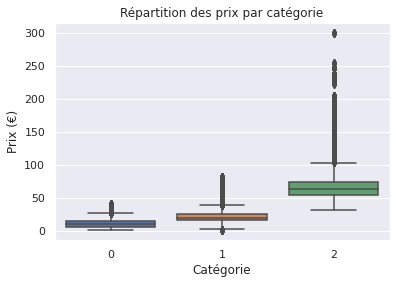

In [57]:
#Boxplot des prix par catégorie avec Seaborn
sns.boxplot(x='categ', y ='price', data =df_transcl).set_title('Répartition des prix par catégorie')
plt.xlabel("Catégorie")
plt.ylabel("Prix (€)")

Il y a asymétrie dans la distribution de la variable Price pour les 3 catégories avec des produits très chers dans la catégorie 2 représentés par les outliers.

In [58]:
#Skewness empirique: mesure l'asymétrie de la distribution de Price par catégorie 
df_prix_cat_skew=df_transcl[['categ', 'price']].groupby('categ', as_index=False).skew()
df_prix_cat_skew=df_prix_cat_skew.rename(columns={'price':'skew'})
df_prix_cat_skew

,categ,skew
0,0,0.422681
1,1,1.734237
2,2,2.183517


Confirmation de l'asymetrie de la distribution de Price pour les 3 catégories. En effet, leurs skewness empiriques sont positifs donc la distribution est étalée à droite. Le skewness de la catégorie 0 est le plus proche de 0 donc la distribution est "faiblement" asymétrique. 

#### <font color='purple'>Outliers des prix par catégorie </font>

In [59]:
#fonction qui liste les outliers
def outlier_list(df,col):
 #trie les valeurs de la colonne
 sorted(col)
 #détecte les outliers et les filtre pour avoir un nouveau dataframe sans outliers
 #1er quartile
 q1 = df[col].quantile(0.25)
 #3eme quartile
 q3 = df[col].quantile(0.75)
 #écart interquatile
 iqr = q3 - q1
 #print('Ecart interquatile =', round(iqr,2))
 seuil_min = q1 -(1.5 * iqr) 
 seuil_max = q3 +(1.5 * iqr)
 return df[(df[col] < seuil_min) | (df[col] > seuil_max)]

In [60]:
#liste des outliers de la categorie 0
df_out0=outlier_list(df_transcl,'price')
serie0=df_out0[df_out0['categ']==0]['price'].value_counts()
set(serie0.index.tolist())

{34.99, 35.3, 36.99, 37.46, 37.53, 37.64, 37.91, 37.99, 39.58, 39.99, 40.99}

In [61]:
#liste des outliers de la categorie 1
df_out1=outlier_list(df_transcl,'price')
serie1=df_out1[df_out1['categ']==1]['price'].value_counts()
set(serie1.index.tolist())

{34.18,
 34.35,
 34.52,
 34.77,
 34.93,
 34.97,
 34.99,
 35.02,
 35.03,
 35.06,
 35.24,
 35.61,
 35.93,
 35.99,
 36.01,
 36.09,
 36.32,
 36.42,
 36.6,
 36.82,
 36.99,
 37.1,
 37.12,
 37.13,
 37.2,
 37.44,
 37.73,
 37.85,
 37.99,
 38.56,
 38.63,
 38.91,
 38.99,
 39.07,
 39.08,
 39.23,
 39.33,
 39.35,
 39.36,
 39.86,
 39.88,
 39.99,
 40.06,
 40.5,
 40.8,
 40.99,
 41.37,
 41.99,
 42.25,
 42.99,
 43.09,
 43.99,
 44.09,
 44.15,
 44.67,
 44.7,
 44.71,
 44.99,
 45.03,
 45.09,
 45.37,
 45.78,
 45.99,
 46.37,
 46.87,
 46.95,
 46.99,
 47.22,
 47.3,
 47.35,
 47.69,
 47.83,
 47.99,
 48.63,
 48.99,
 49.04,
 49.1,
 49.16,
 49.42,
 49.47,
 49.99,
 50.99,
 51.55,
 51.6,
 51.71,
 51.92,
 51.99,
 52.03,
 52.72,
 52.99,
 53.42,
 53.99,
 54.73,
 54.9,
 54.99,
 55.89,
 55.99,
 56.07,
 56.97,
 56.99,
 57.45,
 57.92,
 58.54,
 58.99,
 59.11,
 59.99,
 60.39,
 60.87,
 60.99,
 61.23,
 61.38,
 61.52,
 61.99,
 62.99,
 63.92,
 64.59,
 64.62,
 66.99,
 67.65,
 67.66,
 68.49,
 70.51,
 72.75,
 73.99,
 78.83,
 79.99,
 8

In [62]:
#liste des outliers de la categorie 2
df_out2=outlier_list(df_transcl,'price')
serie2=df_out2[df_out2['categ']==2]['price'].value_counts()
set(serie2.index.tolist())

{34.23,
 36.99,
 39.99,
 40.99,
 41.31,
 42.19,
 42.48,
 42.51,
 43.35,
 43.99,
 46.31,
 46.99,
 47.91,
 48.99,
 49.61,
 49.99,
 50.99,
 52.26,
 53.99,
 54.87,
 54.99,
 55.79,
 55.99,
 56.99,
 57.04,
 57.91,
 57.99,
 59.14,
 60.37,
 60.96,
 60.99,
 62.25,
 62.83,
 63.36,
 63.99,
 64.85,
 65.75,
 67.57,
 67.99,
 68.99,
 69.99,
 70.0,
 70.92,
 71.21,
 71.99,
 72.01,
 72.11,
 72.42,
 72.99,
 73.18,
 73.62,
 73.72,
 73.99,
 75.81,
 77.63,
 77.99,
 78.05,
 78.99,
 79.04,
 79.99,
 80.99,
 81.19,
 82.99,
 83.51,
 83.63,
 83.99,
 84.02,
 84.29,
 84.96,
 84.99,
 85.27,
 85.28,
 85.89,
 86.99,
 87.4,
 88.29,
 88.99,
 89.43,
 89.54,
 90.99,
 91.82,
 93.48,
 93.92,
 93.99,
 96.56,
 96.69,
 96.74,
 96.88,
 96.99,
 98.99,
 99.99,
 100.56,
 100.99,
 101.51,
 101.99,
 102.82,
 102.99,
 103.5,
 103.58,
 103.92,
 103.99,
 104.06,
 104.76,
 104.78,
 104.99,
 105.24,
 105.99,
 106.52,
 107.99,
 108.99,
 109.38,
 109.99,
 110.08,
 110.98,
 111.72,
 111.99,
 113.99,
 114.99,
 115.3,
 115.75,
 115.93,
 115.9

## <a name="C11"><font color='LightSeaGreen'>Analyse du CA</font></a>

#### <font color='purple'>Evolution du CA dans le temps</font>

In [63]:
df_transcl = (df_transcl.set_index(pd.DatetimeIndex(df_transcl['date'].dt.date)))
df_transcl=df_transcl.rename(columns={'date':'date_time'})
df_transcl.head()

,id_prod,price,categ,date_time,session_id,client_id,sex,birth,time,year,month,day,age
date,,,,,,,,,,,,,
2022-02-20,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,17:04:37.204937,2022,2,20,31
2022-10-20,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,17:04:37.204937,2022,10,20,31
2021-10-09,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,21:47:06.777914,2021,10,9,31
2021-04-28,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,06:08:38.261863,2021,4,28,31
2021-07-15,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,10:35:31.526968,2021,7,15,31


In [64]:
#Mettre un index par défaut au lieu de date
df_transcl=df_transcl.reset_index()
df_transcl.head()

,date,id_prod,price,categ,date_time,session_id,client_id,sex,birth,time,year,month,day,age
0,2022-02-20,0_1421,19.99,0,2022-02-20 17:04:37.204937,s_168213,c_6389,f,1991,17:04:37.204937,2022,2,20,31
1,2022-10-20,0_1421,19.99,0,2022-10-20 17:04:37.204937,s_285450,c_6389,f,1991,17:04:37.204937,2022,10,20,31
2,2021-10-09,0_2131,8.99,0,2021-10-09 21:47:06.777914,s_102458,c_6389,f,1991,21:47:06.777914,2021,10,9,31
3,2021-04-28,0_1635,16.99,0,2021-04-28 06:08:38.261863,s_26841,c_6389,f,1991,06:08:38.261863,2021,4,28,31
4,2021-07-15,0_166,1.83,0,2021-07-15 10:35:31.526968,s_62585,c_6389,f,1991,10:35:31.526968,2021,7,15,31


In [65]:
#regroupement et somme des prix pour chaque mois entier 
df_ca_mois=(df_transcl[['date', 'price']].groupby(pd.Grouper(key='date', freq='1M')).sum())
df_ca_mois=df_ca_mois.rename(columns={'price':'ca'})
df_ca_mois

,ca
date,
2021-03-31,482530.52
2021-04-30,476249.16
2021-05-31,493023.39
2021-06-30,484158.49
2021-07-31,482875.36
2021-08-31,482374.70
2021-09-30,507360.56
2021-10-31,320868.67
2021-11-30,516267.63


In [66]:
#CA total
ca_total=sum(df_ca_mois['ca'])
round(ca_total,0)

11855936.0

Le chiffre d'affaires total est approximativement égal à 11.8 millions.

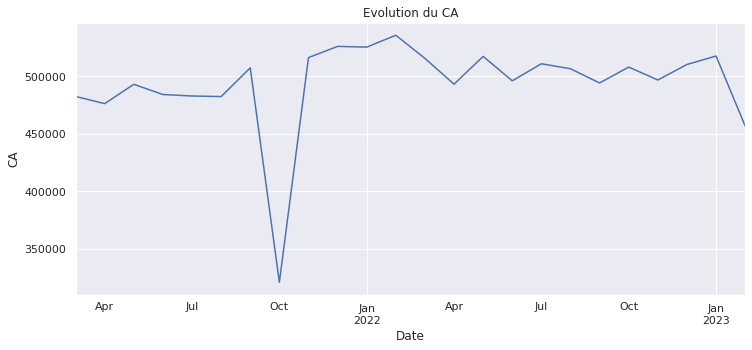

In [67]:
#visualisation du CA dans le temps de mars 2021 à février 2023
df_ca_mois['ca'].plot(figsize=(12,5))
plt.title('Evolution du CA')
plt.xlabel('Date')
plt.ylabel('CA')

plt.savefig("evolution_ca.png")
plt.show()

Nous observons une chute du CA en Octobre 2021 jusqu'à 320868.67€.

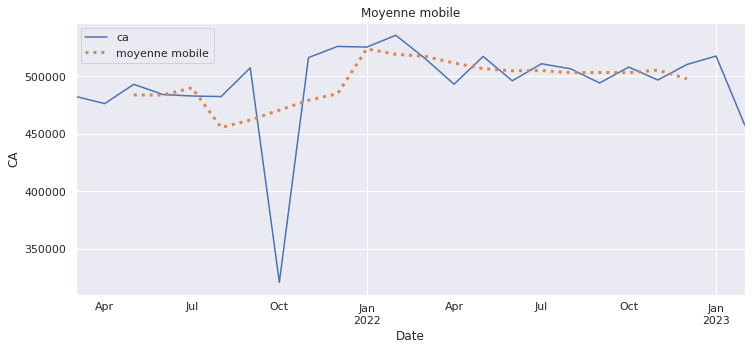

In [68]:
#Lissage des valeurs avec la Moyenne mobile sur les 5 premiers mois 
plt.figure(figsize=(12, 5))
df_ca_mois['ca'].plot(label='ca')
df_ca_mois['ca'].rolling(window=5, center=True).mean().plot(label='moyenne mobile', lw=3, ls=':', alpha=1)
plt.title('Moyenne mobile')
plt.xlabel('Date')
plt.ylabel('CA')
plt.legend()
plt.show()

In [69]:
#Nombre de transactions faites en Octobre 2021
len(df_transcl[(df_transcl['date']>='2021-10-01')&(df_transcl['date']<='2021-10-31')])

21606

In [70]:
#Nombre de transactions faites en Septembre 2021
len(df_transcl[(df_transcl['date']>='2021-09-01')&(df_transcl['date']<='2021-09-30')])

33326

Il y a une grande différence entre le nombre de transactions d'octobre et de septembre, il semblerait qu'il y ait une anomalie dans les données. 

In [108]:
#Calcul du CA par mois pour la catégorie 0 
df_transcl0=df_transcl[df_transcl['categ']==0]
df_ca_mois0=df_transcl0[['date', 'price']].groupby(pd.Grouper(key='date', freq='1M')).sum()
df_ca_mois0=df_ca_mois0.rename(columns={'price':'ca_cat0'})
df_ca_mois0.head()

,ca_cat0
date,
2021-03-31,193719.08
2021-04-30,205362.32
2021-05-31,196266.64
2021-06-30,168013.08
2021-07-31,144790.75


In [72]:
#Calcul du CA par mois pour la catégorie 1
df_transcl1=df_transcl[df_transcl['categ']==1]
df_ca_mois1=df_transcl1[['date', 'price']].groupby(pd.Grouper(key='date', freq='1M')).sum()
df_ca_mois1=df_ca_mois1.rename(columns={'price':'ca_cat1'})
df_ca_mois1

,ca_cat1
date,
2021-03-31,186974.17
2021-04-30,156138.35
2021-05-31,165893.40
2021-06-30,189162.04
2021-07-31,188523.27
2021-08-31,162991.38
2021-09-30,190613.78
2021-10-31,33762.32
2021-11-30,252910.39


Nous observons une baisse du CA pour le mois d'octobre 2021 (33762.32€) en comparaison avec les chiffres des autres mois

In [73]:
#Calcul du CA par mois pour la catégorie 2
df_transcl2=df_transcl[df_transcl['categ']==2]
df_ca_mois2=df_transcl2[['date', 'price']].groupby(pd.Grouper(key='date', freq='1M')).sum()
df_ca_mois2=df_ca_mois2.rename(columns={'price':'ca_cat2'})
df_ca_mois2.head()

,ca_cat2
date,
2021-03-31,101837.27
2021-04-30,114748.49
2021-05-31,130863.35
2021-06-30,126983.37
2021-07-31,149561.34


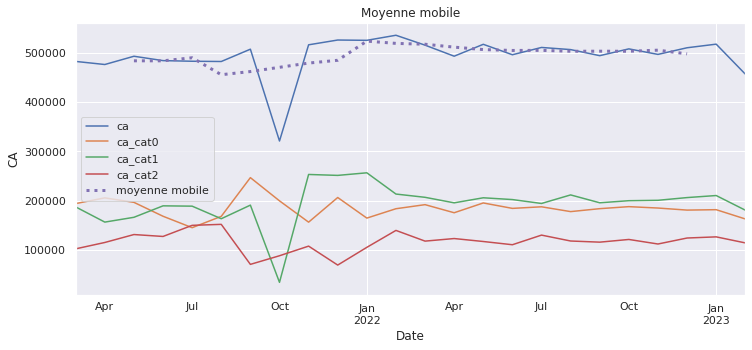

In [74]:
#Comparaison du CA par catégorie 
plt.figure(figsize=(12, 5))
df_ca_mois['ca'].plot(label='ca')
df_ca_mois0['ca_cat0'].plot(label='ca_cat0')
df_ca_mois1['ca_cat1'].plot(label='ca_cat1')
df_ca_mois2['ca_cat2'].plot(label='ca_cat2')
df_ca_mois['ca'].rolling(window=5, center=True).mean().plot(label='moyenne mobile', lw=3, ls=':', alpha=1)
plt.title('Moyenne mobile')
plt.xlabel('Date')
plt.ylabel('CA')
plt.legend()
plt.show()

Nous observons que la chute du CA se situe dans la catégorie 1.

In [75]:
#CA du mois d'octobre pour les produits de catégorie 0
df_ca_cat0_oct=df_transcl[(df_transcl['categ']==0)&(df_transcl['date']>='2021-10-01')&(df_transcl['date']<='2021-10-31')]
df_ca_cat0_oct=df_ca_cat0_oct[['date', 'price']].groupby(pd.Grouper(key='date', freq='D')).sum()
df_ca_cat0_oct=df_ca_cat0_oct.rename(columns={'price':'ca_cat0'})
df_ca_cat0_oct.head()

,ca_cat0
date,
2021-10-01,6950.50
2021-10-02,7141.01
2021-10-03,6786.57
2021-10-04,6553.58
2021-10-05,6357.91


In [76]:
#CA du mois d'octobre pour les produits de catégorie 1
df_ca_cat1_oct=(df_transcl[(df_transcl['categ']==1)&(df_transcl['date']>='2021-10-01')&(df_transcl['date']<='2021-10-31')])
df_ca_cat1_oct=df_ca_cat1_oct[['date', 'price']].groupby(pd.Grouper(key='date', freq='D')).sum()
df_ca_cat1_oct=df_ca_cat1_oct.rename(columns={'price':'ca_cat1'})
df_ca_cat1_oct.head()

,ca_cat1
date,
2021-10-01,7003.79
2021-10-02,0.00
2021-10-03,0.00
2021-10-04,0.00
2021-10-05,0.00


Il n'y a pas de ventes entre le 2 et le 27 Octobre 2021 pour les produits de la catégorie 1.

In [77]:
#CA du mois d'octobre pour les produits de catégorie 2
df_ca_cat2_oct=(df_transcl[(df_transcl['categ']==2)&(df_transcl['date']>='2021-10-01')&(df_transcl['date']<='2021-10-31')])
df_ca_cat2_oct=df_ca_cat2_oct[['date', 'price']].groupby(pd.Grouper(key='date', freq='D')).sum()
df_ca_cat2_oct=df_ca_cat2_oct.rename(columns={'price':'ca_cat2'})
df_ca_cat2_oct.head()

,ca_cat2
date,
2021-10-01,3104.05
2021-10-02,2041.12
2021-10-03,2206.48
2021-10-04,2746.08
2021-10-05,3032.55


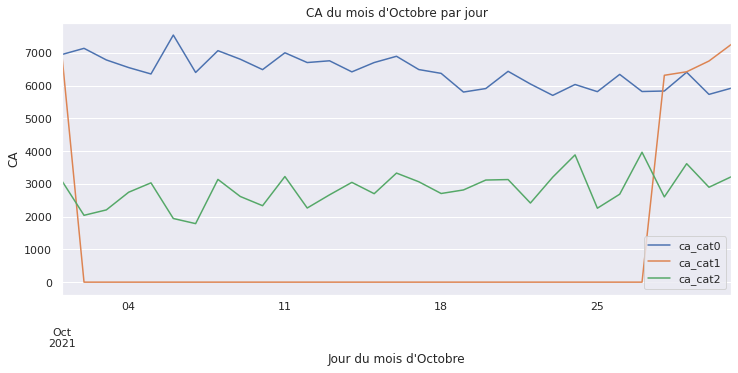

In [78]:
#visualisation du CA du mois d'octobre pour les produits des 3 catégories
plt.figure(figsize=(12, 5))
df_ca_cat0_oct['ca_cat0'].plot(label='ca_cat0')
df_ca_cat1_oct['ca_cat1'].plot(label='ca_cat1')
df_ca_cat2_oct['ca_cat2'].plot(label='ca_cat2')
plt.title('CA du mois d\'Octobre par jour')
plt.xlabel('Jour du mois d\'Octobre')
plt.ylabel('CA')
plt.legend()
plt.show()

Comme nous pouvons le voir sur le graphique, nous n'avons pas de ventes du 2 au 27 octobre 2021. Je suppose qu'il y a eu un oubli ou une erreur de saisie dans les ventes d'Octobre. 

In [79]:
#Imputation du CA des produits de la catégorie 1 par la moyenne du CA de mars 2021 a fevrier 2023 
#des produits de la catégorie 1 sans compter le mois d'octobre 
moy1=round((df_ca_mois1[(df_ca_mois1.index!='2021-10-31')]['ca_cat1']).mean(),2)
ca_cat1_oct=df_ca_mois1['ca_cat1']['2021-10-31']
df_ca_mois1=df_ca_mois1.replace(ca_cat1_oct, moy1)
df_ca_mois1

,ca_cat1
date,
2021-03-31,186974.17
2021-04-30,156138.35
2021-05-31,165893.40
2021-06-30,189162.04
2021-07-31,188523.27
2021-08-31,162991.38
2021-09-30,190613.78
2021-10-31,200867.84
2021-11-30,252910.39


#### <font color='purple'>CA par catégorie</font>

In [80]:
df_ca_cat=df_transcl[['categ', 'price']].groupby('categ').sum()
df_ca_cat=df_ca_cat.rename(columns={'price':'ca'})
df_ca_cat

,ca
categ,
0,4421938.76
1,4653722.69
2,2780275.02


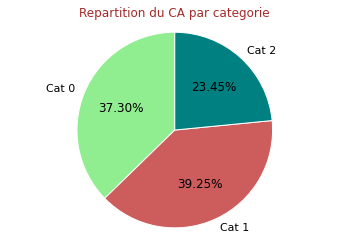

In [81]:
#Diagramme circulaire representant la repartition des catégories 
#liste de couleurs attribuees au diagramme
colors = ['lightgreen', 'indianred', 'teal']
labels = 'Cat 0', 'Cat 1', 'Cat 2'
#donne le titre du diagramme
plt.title('Repartition du CA par categorie', color='brown')

#création du diagramme circulaire
a, b, c = plt.pie(df_ca_cat['ca'], labels=labels, autopct='%1.2f%%', startangle=90, colors=colors)

#trace les axes de facon orthonorme 
plt.axis('equal')

#couleurs des labels
for text in b:
    text.set_color('black')
    
#couleurs des valeurs
for autotext in c:
    autotext.set_color('black')

plt.savefig("repartition_ca.png")
plt.show()

Les produits de la catégorie 1 rapportent le plus grand CA malgré qu'il y ait un "trou" dans les ventes d'octobre 2021.

#### <font color='purple'>CA par sexe et catégorie</font>

In [82]:
#Dataframe du CA total par sexe 
df_ca_sex=df_transcl[['price', 'sex', 'categ']].groupby(['sex', 'categ'], as_index=False).sum()
df_ca_sex=df_ca_sex.rename(columns={'price':'ca'})
df_ca_sex

,sex,categ,ca
0,f,0,2191181.90
1,f,1,2358417.02
2,f,2,1311253.04
3,m,0,2230756.86
4,m,1,2295305.67
5,m,2,1469021.98


In [83]:
df_pivot=df_ca_sex.pivot_table(index='sex', columns='categ', values='ca', aggfunc=sum).reset_index()
df_pivot

categ,sex,0,1,2
0,f,2191181.90,2358417.02,1311253.04
1,m,2230756.86,2295305.67,1469021.98


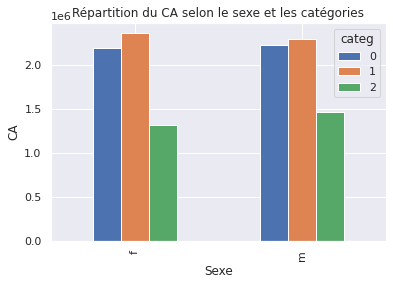

In [84]:
#Diagramme à barres du CA par sexe selon les 3 catégories 
df_pivot_ca_sex=df_pivot.plot(kind='bar', x='sex').set_title('Répartition du CA selon le sexe et les catégories')
#supprime le titre donné par pandas
df_pivot_ca_sex.get_figure().suptitle('')
plt.xlabel('Sexe')
plt.ylabel('CA')

plt.savefig("sex_categ.png")
plt.show()

Il semble que la repartition du CA entre les hommes et les femmes par catégorie est quasiment la même.

#### <font color='purple'>CA par âge et catégorie </font>

In [85]:
#compte les valeurs uniques de la variable age
len((df_transcl['age']).value_counts().unique())

76

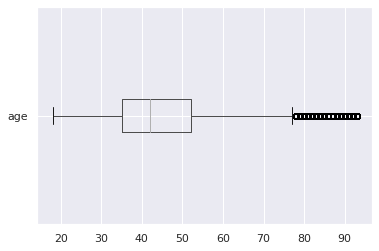

In [86]:
#Distribution de la variable age
df_transcl.boxplot(column='age', vert=False)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f01dbd27c10>]],
      dtype=object)

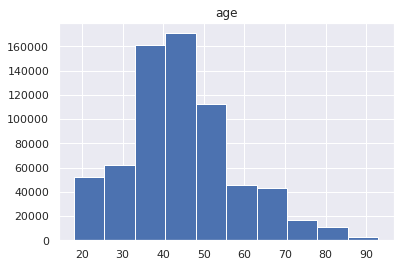

In [87]:
#Distribution de la variable age
df_transcl.hist(column='age')

In [88]:
outlier_filtre(df_transcl,'age')

Ecart interquatile = 17.0
Seuil min: 9.5
Seuil max: 77.5


In [89]:
#Dataframe du CA total par âge 
df_ca_age=df_transcl[['age', 'price']].groupby(['age'], as_index=False).sum()
df_ca_age=df_ca_age.rename(columns={'price':'ca'})
df_ca_age

,age,ca
0,18,609013.69
1,19,178195.78
2,20,184207.32
3,21,178497.70
4,22,165027.96
...,...,...
71,89,5264.34
72,90,5043.19
73,91,2815.45
74,92,4013.87


In [90]:
df_ca_age[df_ca_age['age']==42]

,age,ca
24,42,613654.54


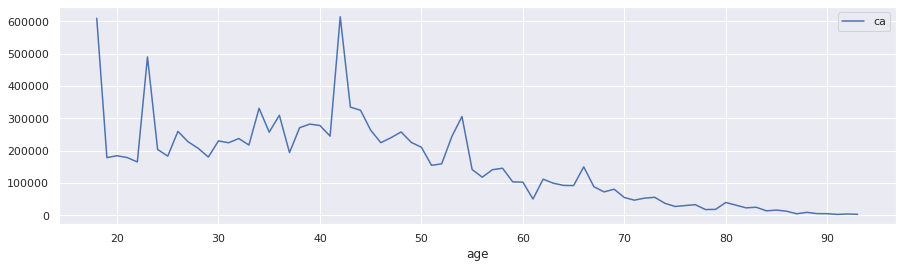

In [91]:
df_ca_age.plot(x='age', y="ca", figsize=(15,4))

On observe 2 pics pour les clients âgés de 18 et 42 ans dont les achats engendrent un CA dépassant 600k€.

In [92]:
df_ca_age_cat=df_transcl[['age', 'categ', 'price']].groupby(['age', 'categ'], as_index=False).sum()
df_ca_age_cat=df_ca_age_cat.rename(columns={'price':'ca'})
df_ca_age_cat

,age,categ,ca
0,18,0,35914.36
1,18,1,118362.47
2,18,2,454736.86
3,19,0,9560.43
4,19,1,34435.66
...,...,...,...
223,92,1,3074.34
224,92,2,111.98
225,93,0,716.76
226,93,1,2359.10


In [93]:
df_pivot_age=df_ca_age_cat.pivot_table(index='age', columns='categ', values='ca', aggfunc=sum).reset_index()
df_pivot_age

categ,age,0,1,2
0,18,35914.36,118362.47,454736.86
1,19,9560.43,34435.66,134199.69
2,20,11279.63,35525.88,137401.81
3,21,10561.99,32236.75,135698.96
4,22,11957.59,32649.00,120421.37
...,...,...,...,...
71,89,1442.78,3771.95,49.61
72,90,1481.93,3439.34,121.92
73,91,897.44,1831.31,86.70
74,92,827.55,3074.34,111.98


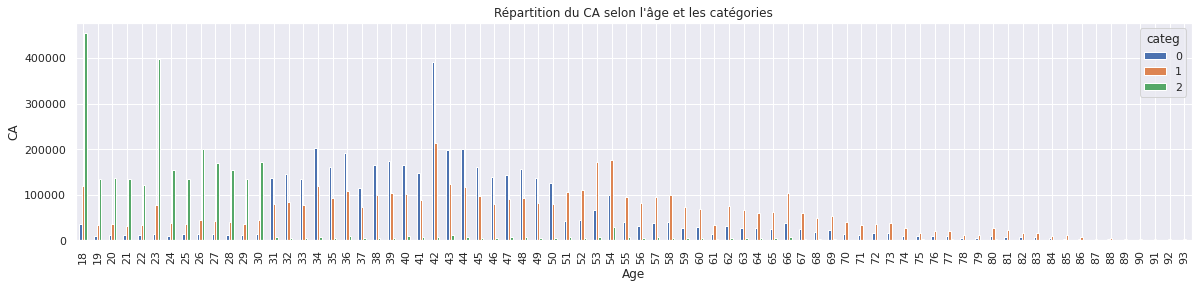

In [94]:
#Diagramme à barres du CA par âge selon les 3 catégories 
#df_pivot_ca_age=df_pivot_age['age'].hist(density=True, bins=10)
df_pivot_ca_age=df_pivot_age.plot(kind='bar', x='age',figsize=(20,4)).set_title('Répartition du CA selon l\'âge et les catégories')
#supprime le titre donné par pandas
df_pivot_ca_age.get_figure().suptitle('')
plt.xlabel('Age')
plt.ylabel('CA')

plt.savefig("age_categ.png")
plt.show()

On observe un pic d'achat pour les personnes âgées de 42 ans qui achetent des produits de la catégorie 0 et 2 pics d'achats pour les personnees âgées de 18 et 23 ans qui achètent des produits de la catégorie 2.

#### <font color='purple'>CA par client</font>

In [95]:
#Client et CA
df_clients_ca=df_transcl[['client_id', 'price']].groupby(['client_id'], as_index=False).sum()
df_clients_ca=df_clients_ca.rename(columns={'price':'ca'})
df_clients_ca

,client_id,ca
0,c_1,558.18
1,c_10,1353.60
2,c_100,254.85
3,c_1000,2261.89
4,c_1001,1812.86
...,...,...
8595,c_995,189.41
8596,c_996,1625.58
8597,c_997,1490.01
8598,c_998,2779.88


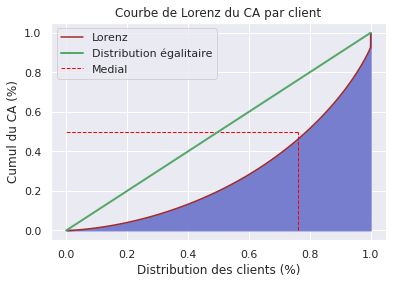

In [96]:
#Courbe de Lorenz sur le CA par client
#Sélection du sous-échantillon de travail que l'on appelle ca
ca_client = df_clients_ca['ca'].values

#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_ca_client = np.cumsum(np.sort(ca_client)) / ca_client.sum()

plt.plot(np.linspace(0,1,len(lorenz_ca_client)), lorenz_ca_client, drawstyle='steps-post', color='brown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_ca_client)) ,lorenz_ca_client , color='#777ecd')
plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz du CA par client')
plt.xlabel("Distribution des clients (%)")
plt.ylabel("Cumul du CA (%)")
plt.legend(loc="best")

plt.savefig("lorenz_ca_client.png")
plt.show()

78% des clients font 50% du CA total.

In [97]:
#Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
#Calcul de l'indice de Gini
aire_client=(lorenz_ca_client.sum()-(lorenz_ca_client[-1]/2)-(lorenz_ca_client[0]/2))/(len(lorenz_ca_client))
S_client=0.5-aire_client
gini_client=2*S_client
print('Coefficient de Gini=', round(gini_client,2))

Coefficient de Gini= 0.45


Le coefficient de Gini est plus proche de 0 que de 1 donc la répartition des clients est presque égalitaire.

#### <font color='purple'>CA par produit</font>

In [98]:
#Produit et CA
df_prod_ca=df_transcl[['id_prod', 'price']].groupby(['id_prod'], as_index=False).sum()
df_prod_ca=df_prod_ca.rename(columns={'price':'ca'})
df_prod_ca

,id_prod,ca
0,0_0,4657.50
1,0_1,5352.13
2,0_10,394.90
3,0_100,61.80
4,0_1000,2954.88
...,...,...
3261,2_95,395.96
3262,2_96,28650.18
3263,2_97,2092.87
3264,2_98,149.74


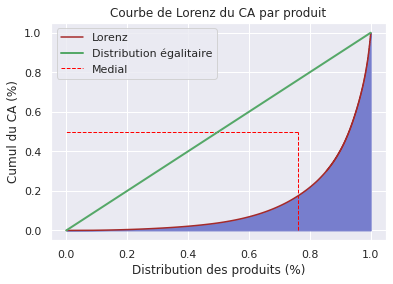

In [99]:
#Courbe de Lorenz sur le CA par client
#Sélection du sous-échantillon de travail que l'on appelle ca
ca_produit = df_prod_ca['ca'].values

#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_ca_produit = np.cumsum(np.sort(ca_produit)) / ca_produit.sum()

plt.plot(np.linspace(0,1,len(lorenz_ca_produit)), lorenz_ca_produit, drawstyle='steps-post', color='brown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_ca_produit)) ,lorenz_ca_produit , color='#777ecd')
plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz du CA par produit')
plt.xlabel("Distribution des produits (%)")
plt.ylabel("Cumul du CA (%)")
plt.legend(loc="best")

plt.savefig("lorenz_ca_produit.png")
plt.show()

22% des produits restant font 80% du CA total.

In [100]:
#Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
#Calcul de l'indice de Gini
aire_produit=(lorenz_ca_produit.sum()-(lorenz_ca_produit[-1]/2)-(lorenz_ca_produit[0]/2))/(len(lorenz_ca_produit))
S_produit=0.5-aire_produit
gini_produit=2*S_produit
print('Coefficient de Gini=', round(gini_produit,2))

Coefficient de Gini= 0.74


Le coefficient de Gini est plus proche de 1 que de 0 donc la répartition des produits n'est pas égalitaire.

## <a name="C13"><font color='LightSeaGreen'>Distribution du nombre d’achats (ou du prix moyen du panier) par client (analyse par courbe de Lorenz)</font></a>

#### <font color='purple'>Repartition du nombre d'achats par catégorie </font>

In [101]:
#Nombre d'achats par catégorie 
df_prix_cat=df_transcl[['categ', 'price']].groupby('categ', as_index=False).count()
df_prix_cat=df_prix_cat.rename(columns={'price':'effectif'})
df_prix_cat

,categ,effectif
0,0,415680
1,1,227169
2,2,36483


In [102]:
#Calcul de la fréquence d'achats par catégorie 
df_prix_cat['frequence']=df_prix_cat['effectif']/(sum(df_prix_cat['effectif']))
df_prix_cat

,categ,effectif,frequence
0,0,415680,0.611895
1,1,227169,0.334401
2,2,36483,0.053704


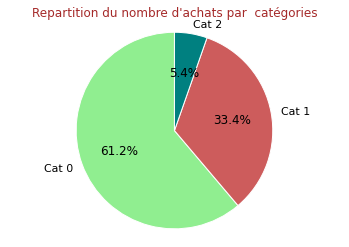

In [103]:
#Diagramme circulaire representant la repartition du nombre d'achats par catégorie 
#liste de couleurs attribuees au diagramme
colors = ['lightgreen', 'indianred', 'teal']
labels = 'Cat 0', 'Cat 1', 'Cat 2'
#donne le titre du diagramme
plt.title('Repartition du nombre d\'achats par  catégories', color='brown')

#création du diagramme circulaire
a, b, c = plt.pie(df_prix_cat['frequence'], labels=labels, autopct='%1.1f%%', startangle=90, colors=colors)

#trace les axes de facon orthonorme 
plt.axis('equal')

#couleurs des labels
for text in b:
    text.set_color('black')
    
#couleurs des valeurs
for autotext in c:
    autotext.set_color('black')

plt.savefig("repartition_categories.png")
plt.show()

Les produits les plus achetés sont ceux de la catégorie 0.

#### <font color='purple'>Panier moyen par client</font>

In [104]:
#création du df des clients et le nombre de leurs achats
df_clients_achats=df_transcl[['client_id', 'session_id']].groupby(['client_id'], as_index=False).count()
df_clients_achats=df_clients_achats.rename(columns={'session_id':'nb_achats'})
df_clients_achats.head()

,client_id,nb_achats
0,c_1,39
1,c_10,58
2,c_100,8
3,c_1000,125
4,c_1001,102


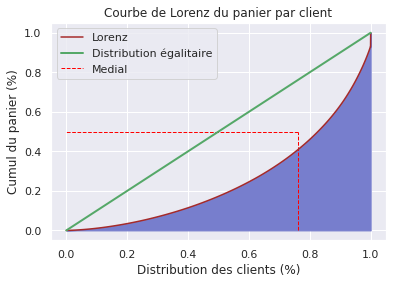

In [105]:
#Courbe de Lorenz sur le CA par client
#Sélection du sous-échantillon de travail que l'on appelle ca
panier_client = df_clients_achats['nb_achats'].values

#On place les observations dans une variable
#Tri des individus dans l'ordre croissant des valeurs de la variable, 
#Calcul de la somme cumulée et normalisation en divisant par la somme des observations
lorenz_panier_client = np.cumsum(np.sort(panier_client)) / panier_client.sum()

plt.plot(np.linspace(0,1,len(lorenz_panier_client)), lorenz_panier_client, drawstyle='steps-post', color='brown', label='Lorenz')
plt.fill_between(np.linspace(0,1,len(lorenz_panier_client)) ,lorenz_panier_client , color='#777ecd')
plt.plot([0, 1], [0, 1], 'g-', lw=2, label='Distribution égalitaire')
plt.vlines(x=.76, ymin=0, ymax=.5, color='red', linestyle='--', linewidth=1, label='Medial')
plt.hlines(xmin=.76, xmax=0, y=.5, color='red', linestyle='--', linewidth=1)

plt.title('Courbe de Lorenz du panier par client')
plt.xlabel("Distribution des clients (%)")
plt.ylabel("Cumul du panier (%)")
plt.legend(loc="best")

plt.savefig("lorenz_panier_client.png")
plt.show()

80% des clients ont fait 50% du nombre d'achats.

In [106]:
#Mesure de l'aire entre la 1ere bissectrice et la courbe de Lorenz 
#Calcul de l'indice de Gini
aire_panier=(lorenz_panier_client.sum()-(lorenz_panier_client[-1]/2)-(lorenz_panier_client[0]/2))/(len(lorenz_panier_client))
S_panier=0.5-aire_panier
gini_panier=2*S_panier
print('Coefficient de Gini=', round(gini_panier,2))

Coefficient de Gini= 0.5
